In [8]:
import numpy as np
import pandas as pd

In [9]:
wine = pd.read_csv('WineQT.csv');

In [10]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
#checking no of rows and coloumns
wine.shape

(1143, 13)

In [53]:
wine = wine.drop('Id',axis=1)

In [54]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#checking for missing values 
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [55]:
import seaborn as sns

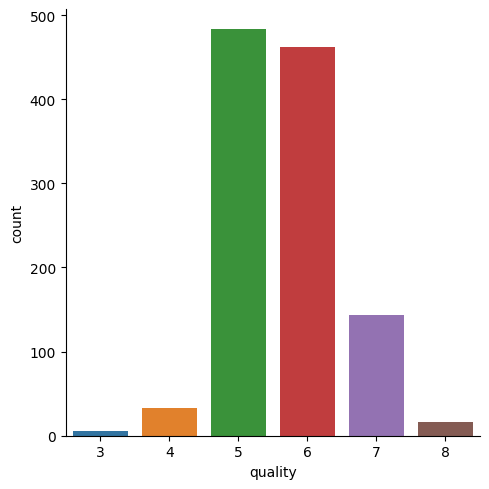

In [56]:
#number of values for each quality
sns.catplot(x='quality',data = wine ,kind = 'count')

In [57]:
import matplotlib.pyplot as ply

<Axes: xlabel='quality', ylabel='volatile acidity'>

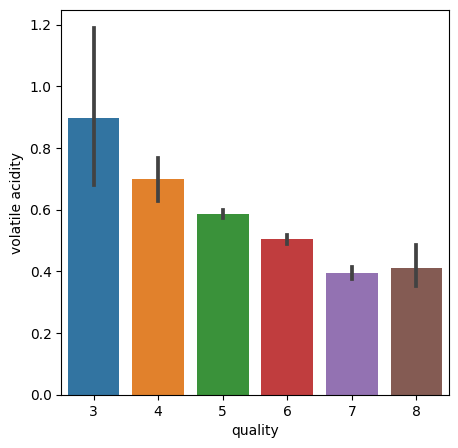

In [59]:
#volatile acidity vs Quality
plot = ply.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

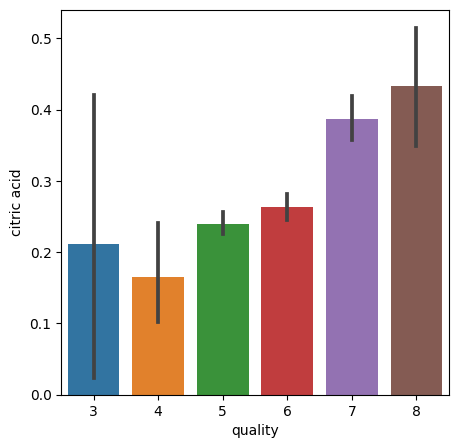

In [19]:
#citric acid vs Quality
plot = ply.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

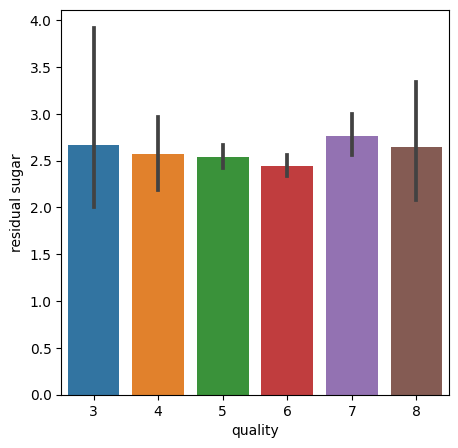

In [61]:
#residual sugar vs Quality
plot = ply.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=wine)

Correlation

1.Positive Correlation
2.Negative Correlation

In [62]:
correlation= wine.corr()

<Axes: >

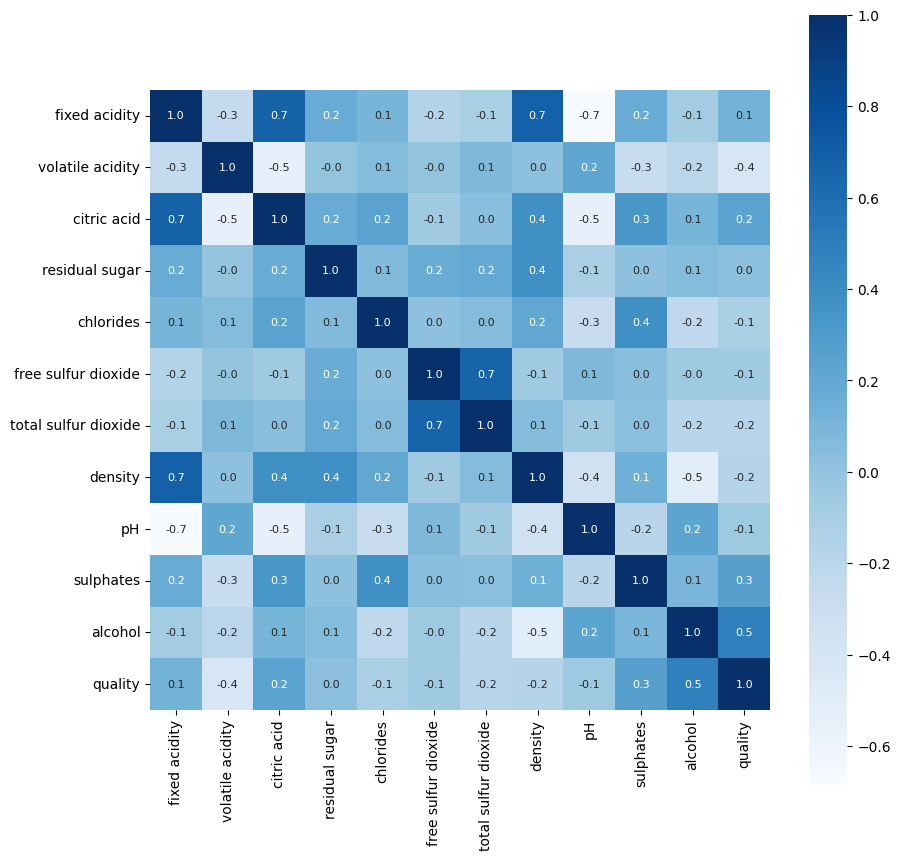

In [63]:
ply.figure(figsize=(10,10))
sns.heatmap(correlation,cbar= True,square=True,fmt ='.1f',annot=True,annot_kws = {'size':8} ,cmap = 'Blues') 

Data Prerocessing

In [64]:
X = wine.drop('quality',axis=1) # id delete coloumn axis =1 if row axis =0

In [65]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

LABEL BINARIZATION

In [99]:
y = wine['quality'].apply(lambda y_value:1 if y_value>= 7 else 0)

In [100]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


In [101]:
#train and test split
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [104]:
model.score(X_test,Y_test)

0.9213973799126638

In [105]:
prediction = model.predict([[7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0]])
print(prediction)

[0]


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [106]:
if(prediction[0]==1):
    print("WINE  quality good")
else:
    print("Wine Quality bad")

Wine Quality bad
